In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler, LabelEncoder

# Load the dataset
df = pd.read_csv('/content/drive/MyDrive/DATASETS/complete_dataset (1).csv')
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,2015-01-01,99635.030,25.633696,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,2015-01-02,129606.010,33.138988,121082.015,38.837661,8523.995,-47.809777,0.062500,15.4,38.8,26.8,0.0,N,N
2,2015-01-03,142300.540,34.564855,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,2015-01-04,104330.715,25.005560,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,2015-01-05,118132.200,26.724176,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


In [ ]:
# Convert date to datetime format
df['date'] = pd.to_datetime(df['date'])
print(df)

           date      demand        RRP  demand_pos_RRP  RRP_positive  \
0    2015-01-01   99635.030  25.633696       97319.240     26.415953   
1    2015-01-02  129606.010  33.138988      121082.015     38.837661   
2    2015-01-03  142300.540  34.564855      142300.540     34.564855   
3    2015-01-04  104330.715  25.005560      104330.715     25.005560   
4    2015-01-05  118132.200  26.724176      118132.200     26.724176   
...         ...         ...        ...             ...           ...   
2101 2020-10-02   99585.835  -6.076028       41988.240     26.980251   
2102 2020-10-03   92277.025  -1.983471       44133.510     32.438156   
2103 2020-10-04   94081.565  25.008614       88580.995     26.571687   
2104 2020-10-05  113610.030  36.764701      106587.375     39.616015   
2105 2020-10-06  122607.560  75.771059      122607.560     75.771059   

      demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0           2315.790     -7.240000         0.020833            

In [ ]:
# Basic information about the dataset
print(df.info())
print("\nBasic statistics:")
print(df.describe())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2106 entries, 0 to 2105
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   date             2106 non-null   datetime64[ns]
 1   demand           2106 non-null   float64       
 2   RRP              2106 non-null   float64       
 3   demand_pos_RRP   2106 non-null   float64       
 4   RRP_positive     2106 non-null   float64       
 5   demand_neg_RRP   2106 non-null   float64       
 6   RRP_negative     2106 non-null   float64       
 7   frac_at_neg_RRP  2106 non-null   float64       
 8   min_temperature  2106 non-null   float64       
 9   max_temperature  2106 non-null   float64       
 10  solar_exposure   2105 non-null   float64       
 11  rainfall         2103 non-null   float64       
 12  school_day       2106 non-null   object        
 13  holiday          2106 non-null   object        
dtypes: datetime64[ns](1), float64(11), objec

In [ ]:
# Handle missing values
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
df[numeric_cols] = df[numeric_cols].fillna(df[numeric_cols].mean())
print(df)

           date      demand        RRP  demand_pos_RRP  RRP_positive  \
0    2015-01-01   99635.030  25.633696       97319.240     26.415953   
1    2015-01-02  129606.010  33.138988      121082.015     38.837661   
2    2015-01-03  142300.540  34.564855      142300.540     34.564855   
3    2015-01-04  104330.715  25.005560      104330.715     25.005560   
4    2015-01-05  118132.200  26.724176      118132.200     26.724176   
...         ...         ...        ...             ...           ...   
2101 2020-10-02   99585.835  -6.076028       41988.240     26.980251   
2102 2020-10-03   92277.025  -1.983471       44133.510     32.438156   
2103 2020-10-04   94081.565  25.008614       88580.995     26.571687   
2104 2020-10-05  113610.030  36.764701      106587.375     39.616015   
2105 2020-10-06  122607.560  75.771059      122607.560     75.771059   

      demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0           2315.790     -7.240000         0.020833            

In [ ]:
# Remove duplicates
df.drop_duplicates(inplace=True)

In [ ]:
# Scale all numeric columns
scaler = MinMaxScaler()
df[numeric_cols] = scaler.fit_transform(df[numeric_cols])
print(df)

           date    demand       RRP  demand_pos_RRP  RRP_positive  \
0    2015-01-01  0.169948  0.006960        0.430037      0.002832   
1    2015-01-02  0.520242  0.008608        0.614724      0.005571   
2    2015-01-03  0.668613  0.008921        0.779636      0.004629   
3    2015-01-04  0.224830  0.006823        0.484531      0.002521   
4    2015-01-05  0.386139  0.007200        0.591797      0.002900   
...         ...       ...       ...             ...           ...   
2101 2020-10-02  0.169373  0.000000        0.000000      0.002957   
2102 2020-10-03  0.083949  0.000898        0.016673      0.004160   
2103 2020-10-04  0.105040  0.006823        0.362123      0.002867   
2104 2020-10-05  0.333285  0.009404        0.502070      0.005742   
2105 2020-10-06  0.438446  0.017966        0.626580      0.013713   

      demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0           0.040206      0.978844         0.033333         0.463504   
1           0.147992      0

In [ ]:
 #Encode categorical variables
le = LabelEncoder()
df['school_day'] = le.fit_transform(df['school_day'])
df['holiday'] = le.fit_transform(df['holiday'])
print(df)

           date    demand       RRP  demand_pos_RRP  RRP_positive  \
0    2015-01-01  0.169948  0.006960        0.430037      0.002832   
1    2015-01-02  0.520242  0.008608        0.614724      0.005571   
2    2015-01-03  0.668613  0.008921        0.779636      0.004629   
3    2015-01-04  0.224830  0.006823        0.484531      0.002521   
4    2015-01-05  0.386139  0.007200        0.591797      0.002900   
...         ...       ...       ...             ...           ...   
2101 2020-10-02  0.169373  0.000000        0.000000      0.002957   
2102 2020-10-03  0.083949  0.000898        0.016673      0.004160   
2103 2020-10-04  0.105040  0.006823        0.362123      0.002867   
2104 2020-10-05  0.333285  0.009404        0.502070      0.005742   
2105 2020-10-06  0.438446  0.017966        0.626580      0.013713   

      demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0           0.040206      0.978844         0.033333         0.463504   
1           0.147992      0

In [ ]:
# Extract additional date features
df['day'] = df['date'].dt.day
df['month'] = df['date'].dt.month
df['year'] = df['date'].dt.year
print(df)

           date    demand       RRP  demand_pos_RRP  RRP_positive  \
0    2015-01-01  0.169948  0.006960        0.430037      0.002832   
1    2015-01-02  0.520242  0.008608        0.614724      0.005571   
2    2015-01-03  0.668613  0.008921        0.779636      0.004629   
3    2015-01-04  0.224830  0.006823        0.484531      0.002521   
4    2015-01-05  0.386139  0.007200        0.591797      0.002900   
...         ...       ...       ...             ...           ...   
2101 2020-10-02  0.169373  0.000000        0.000000      0.002957   
2102 2020-10-03  0.083949  0.000898        0.016673      0.004160   
2103 2020-10-04  0.105040  0.006823        0.362123      0.002867   
2104 2020-10-05  0.333285  0.009404        0.502070      0.005742   
2105 2020-10-06  0.438446  0.017966        0.626580      0.013713   

      demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0           0.040206      0.978844         0.033333         0.463504   
1           0.147992      0

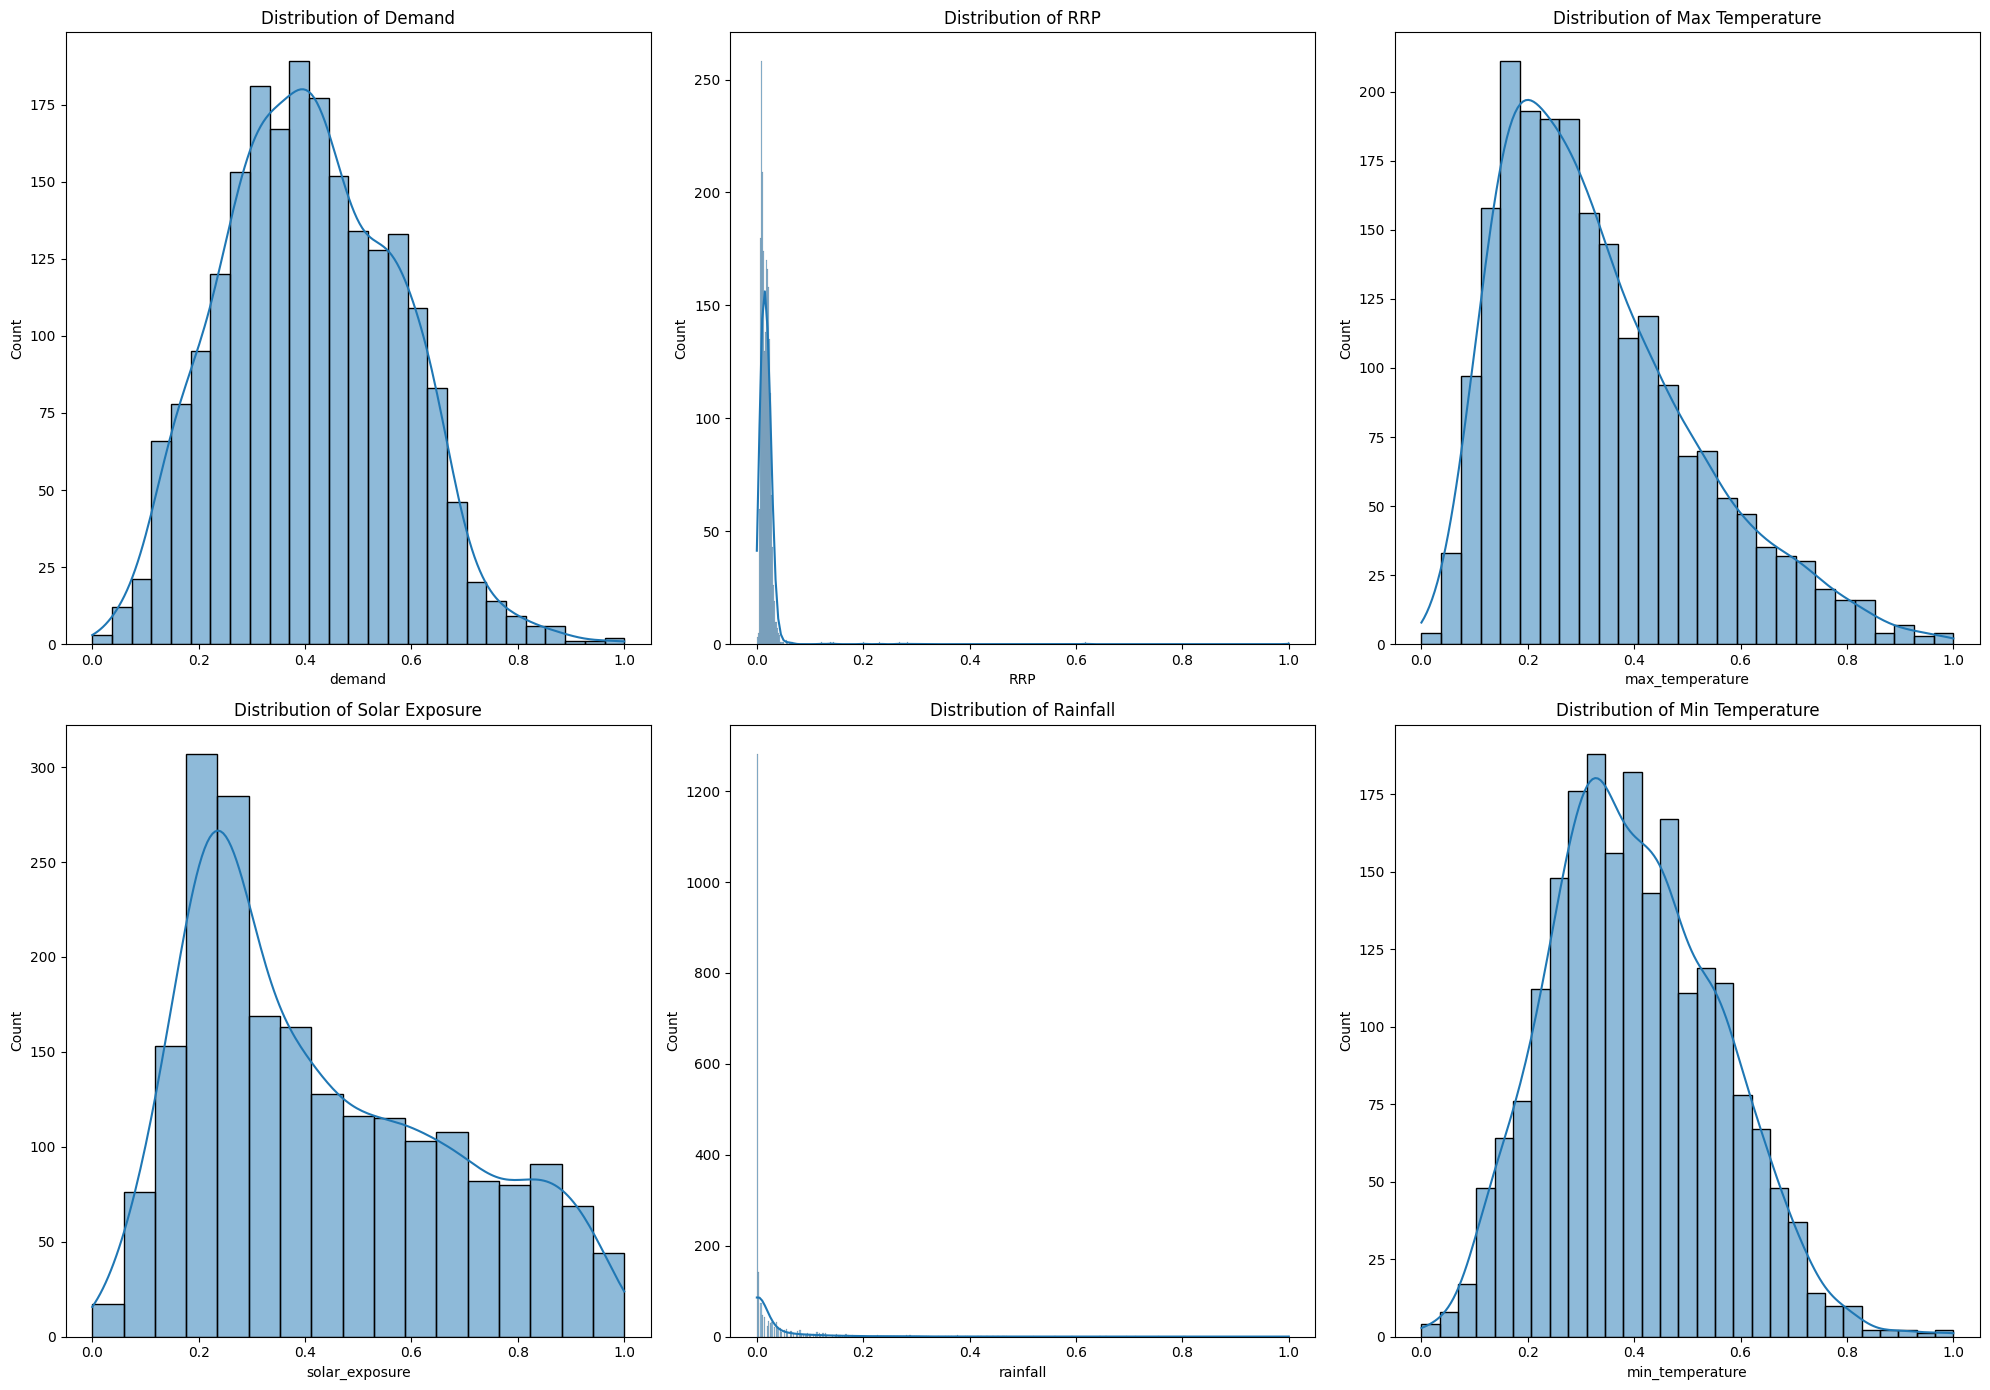

In [ ]:
# 1. Visualize distributions of key variables
fig, axes = plt.subplots(2, 3, figsize=(20, 14))
sns.histplot(df['demand'], kde=True, ax=axes[0, 0])
axes[0, 0].set_title('Distribution of Demand')
sns.histplot(df['RRP'], kde=True, ax=axes[0, 1])
axes[0, 1].set_title('Distribution of RRP')
sns.histplot(df['max_temperature'], kde=True, ax=axes[0, 2])
axes[0, 2].set_title('Distribution of Max Temperature')
sns.histplot(df['solar_exposure'], kde=True, ax=axes[1, 0])
axes[1, 0].set_title('Distribution of Solar Exposure')
sns.histplot(df['rainfall'], kde=True, ax=axes[1, 1])
axes[1, 1].set_title('Distribution of Rainfall')
sns.histplot(df['min_temperature'], kde=True, ax=axes[1, 2])
axes[1, 2].set_title('Distribution of Min Temperature')
plt.tight_layout()
plt.show()


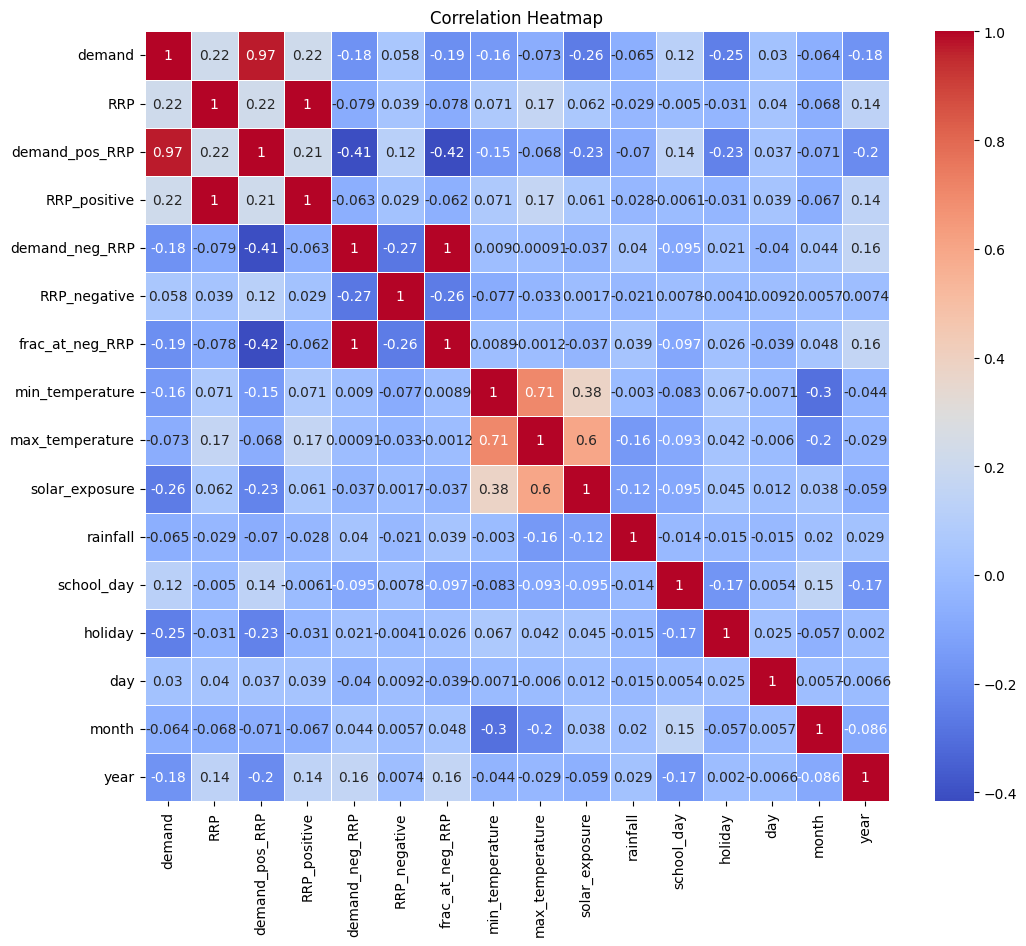

In [ ]:
# Correlation heatmap
plt.figure(figsize=(12, 10))
corr = df.select_dtypes(include=[np.number]).corr()
sns.heatmap(corr, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Correlation Heatmap')
plt.show()

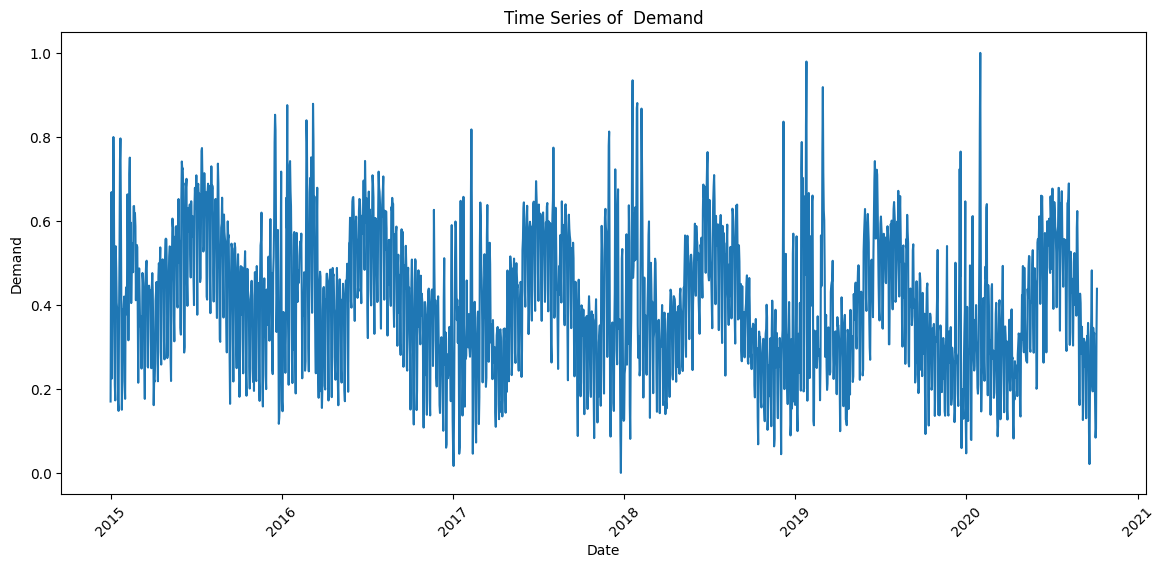

In [ ]:
# Time series plot Electricity of demand
plt.figure(figsize=(14, 6))
plt.plot(df['date'], df['demand'])
plt.title('Time Series of  Demand')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.xticks(rotation=45)
plt.show()

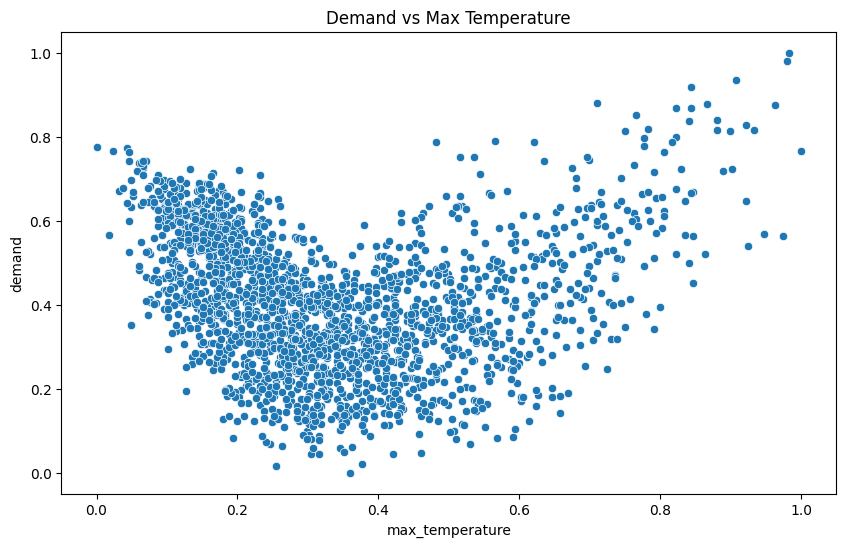

In [ ]:
#Scatter plot: Demand vs Max Temperature
plt.figure(figsize=(10, 6))
sns.scatterplot(x='max_temperature', y='demand', data=df)
plt.title('Demand vs Max Temperature')
plt.show()


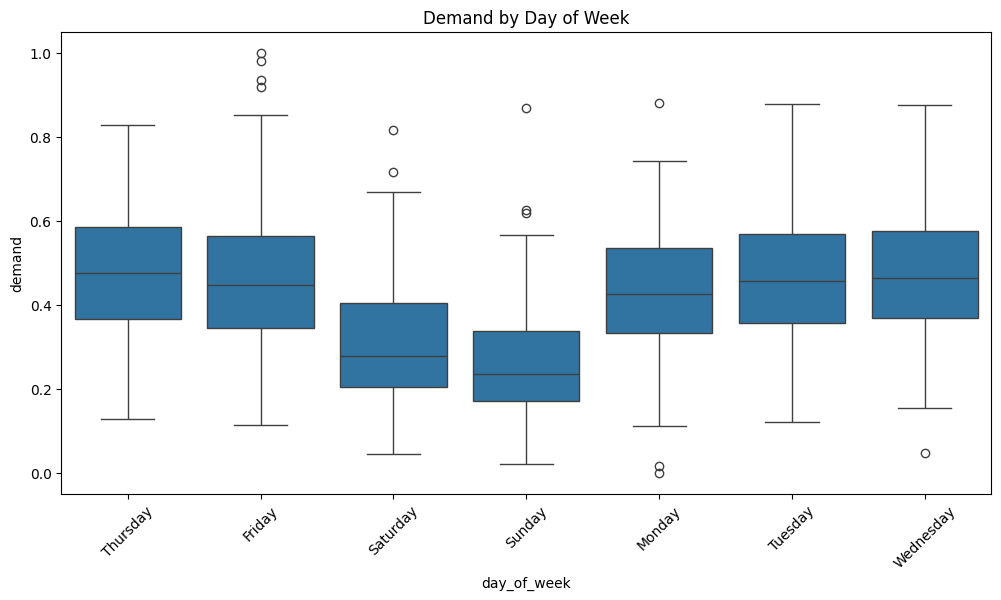

In [ ]:
# Box plot: Demand by Day of Week
df['day_of_week'] = df['date'].dt.day_name()
plt.figure(figsize=(12, 6))
sns.boxplot(x='day_of_week', y='demand', data=df)
plt.title('Demand by Day of Week')
plt.xticks(rotation=45)
plt.show()


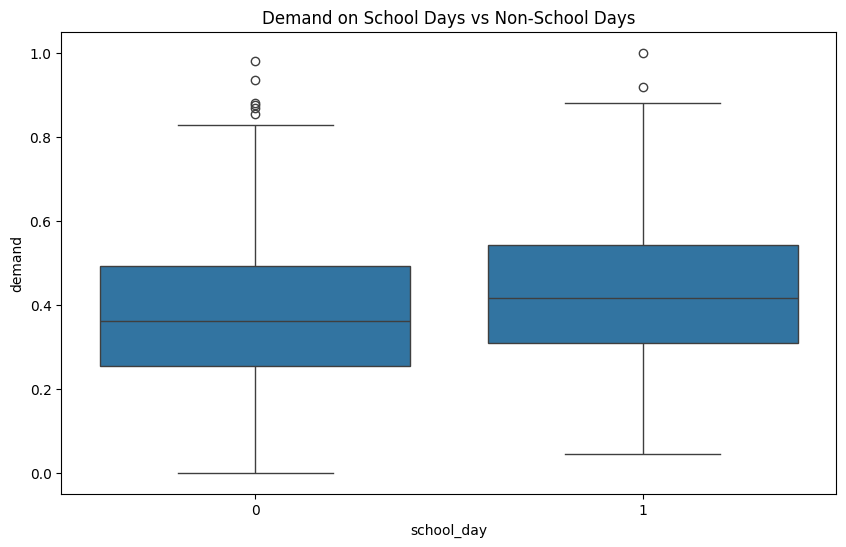


Average demand on holidays vs non-holidays:
holiday
0    0.416135
1    0.204135
Name: demand, dtype: float64


In [ ]:
# Demand on School Days vs Holidays
plt.figure(figsize=(10, 6))
sns.boxplot(x='school_day', y='demand', data=df)
plt.title('Demand on School Days vs Non-School Days')
plt.show()

print("\nAverage demand on holidays vs non-holidays:")
print(df.groupby('holiday')['demand'].mean())


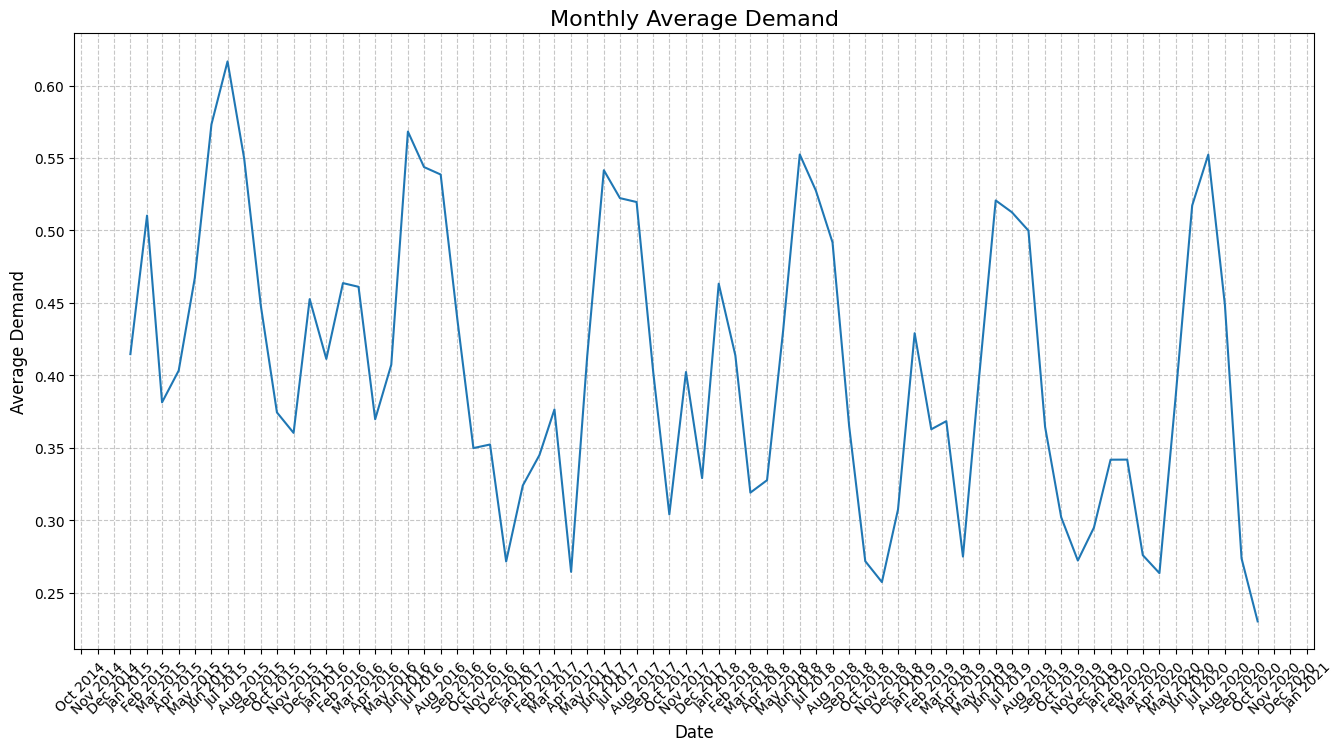

In [ ]:
import matplotlib.dates as mdates

# 7. Monthly average demand
monthly_demand = df.groupby(df['date'].dt.to_period('M'))['demand'].mean().reset_index()
monthly_demand['date'] = monthly_demand['date'].dt.to_timestamp()

plt.figure(figsize=(16, 8))
plt.plot(monthly_demand['date'], monthly_demand['demand'])
plt.title('Monthly Average Demand', fontsize=16)
plt.xlabel('Date', fontsize=12)
plt.ylabel('Average Demand', fontsize=12)

# Set x-axis major locator to show only months
plt.gca().xaxis.set_major_locator(mdates.MonthLocator())
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))

plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


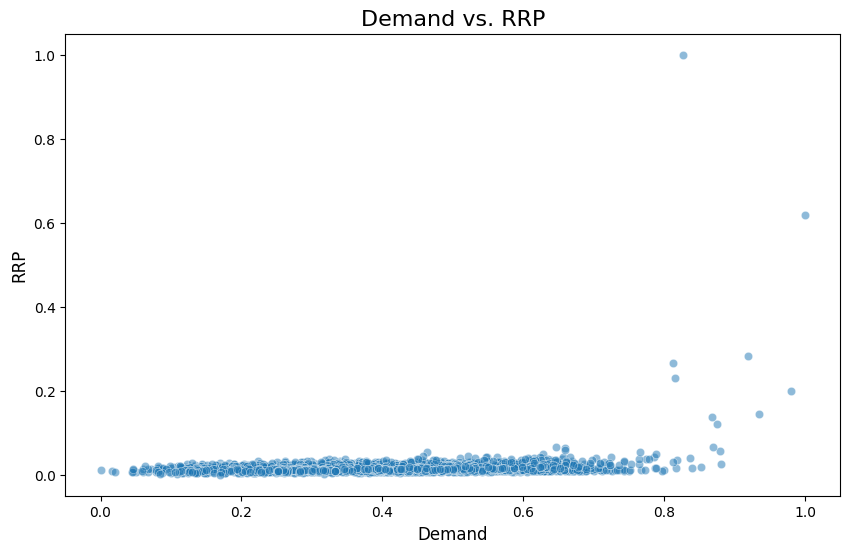

In [ ]:
# Demand vs. RRP scatter plot
plt.figure(figsize=(10, 6))
sns.scatterplot(x='demand', y='RRP', data=df, alpha=0.5)
plt.title('Demand vs. RRP', fontsize=16)
plt.xlabel('Demand', fontsize=12)
plt.ylabel('RRP', fontsize=12)
plt.show()

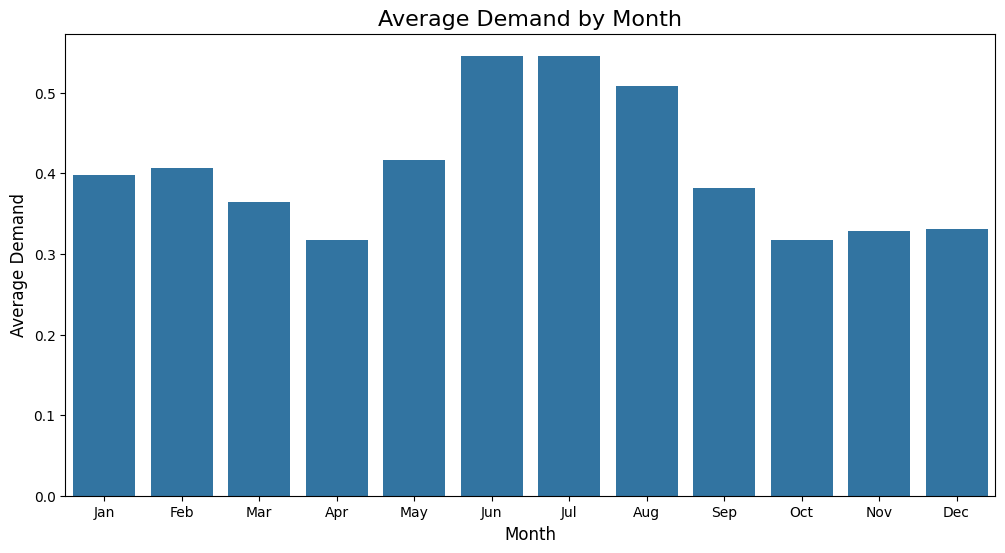

In [ ]:
# Additional analysis: Demand by month
monthly_demand = df.groupby(df['date'].dt.month)['demand'].mean().reset_index()
monthly_demand['month'] = monthly_demand['date'].map({1:'Jan', 2:'Feb', 3:'Mar', 4:'Apr', 5:'May', 6:'Jun',
                                                      7:'Jul', 8:'Aug', 9:'Sep', 10:'Oct', 11:'Nov', 12:'Dec'})

plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='demand', data=monthly_demand)
plt.title('Average Demand by Month', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Demand', fontsize=12)
plt.show()

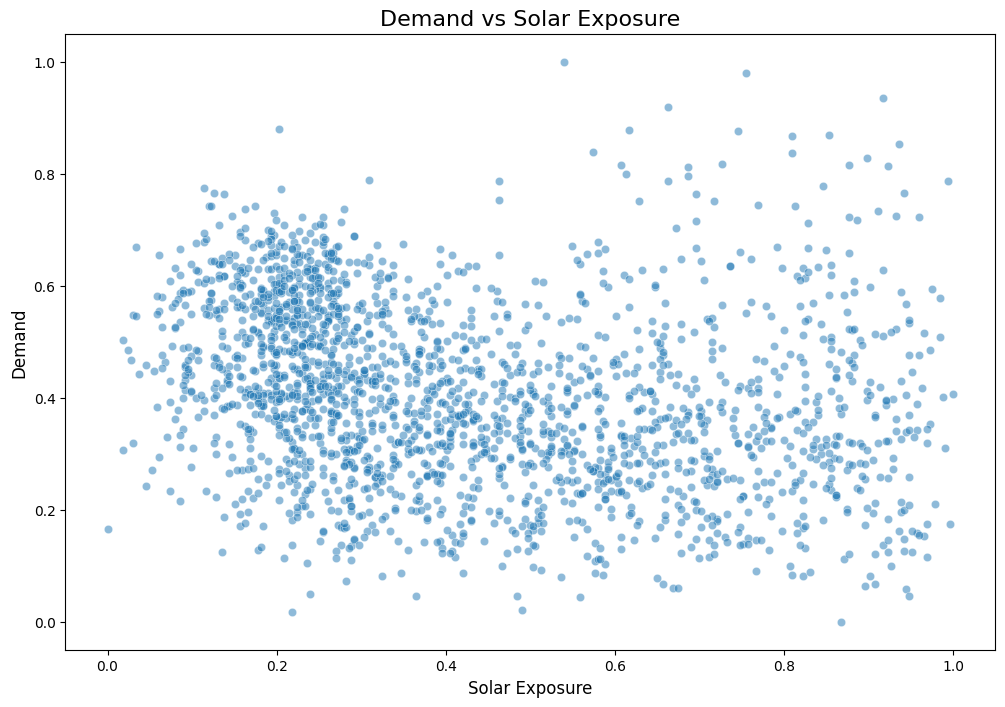

In [ ]:
#Demand vs Solar Exposure scatter plot
plt.figure(figsize=(12, 8))
sns.scatterplot(x='solar_exposure', y='demand', data=df, alpha=0.5)
plt.title('Demand vs Solar Exposure', fontsize=16)
plt.xlabel('Solar Exposure', fontsize=12)
plt.ylabel('Demand', fontsize=12)
plt.show()

<Figure size 1200x1000 with 0 Axes>

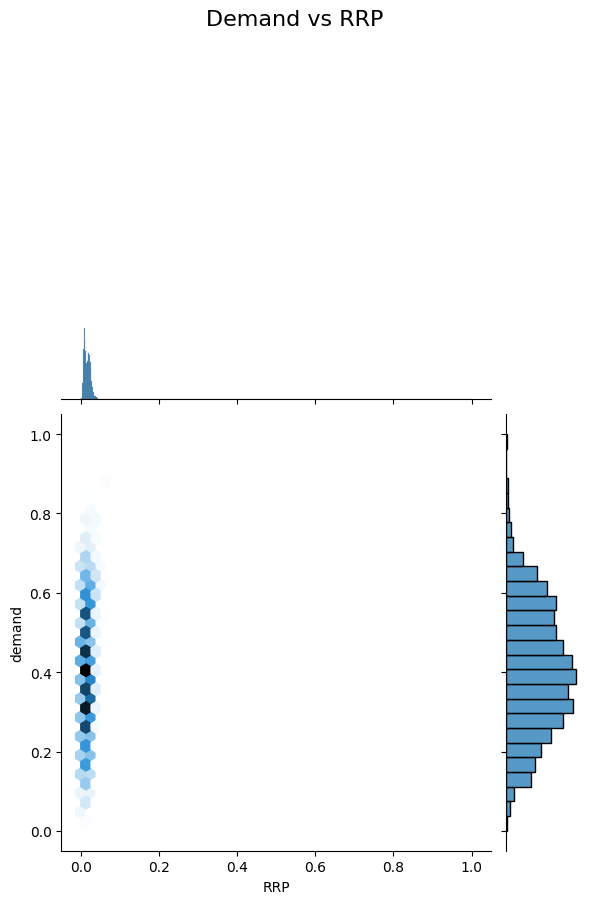

In [ ]:
#Demand vs. RRP Joint Plot
plt.figure(figsize=(12, 10))
sns.jointplot(x='RRP', y='demand', data=df, kind='hex')
plt.suptitle('Demand vs RRP', y=1.5, fontsize=16)
plt.show()

In [ ]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_rows}")


Number of duplicate rows: 0


In [ ]:
duplicate_columns = df.duplicated().sum()
print(f"Number of duplicate columns: {duplicate_columns}")


Number of duplicate columns: 0


In [ ]:
null_values = df.isnull().sum()
print("Number of null values of each column:\n",null_values)


Number of null values of each column:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
day_of_week        0
day                0
month              0
year               0
dtype: int64


In [ ]:
# Final DataFrame shape
print(f"\nDataFrame shape after preprocessing: {df.shape}")
display(df)


DataFrame shape after preprocessing: (2106, 18)


,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday,day,month,year,day_of_week
0,2015-01-01,0.169948,0.006960,0.430037,0.002832,0.040206,0.978844,0.033333,0.463504,0.518841,0.702454,0.000000,0,1,1,1,2015,Thursday
1,2015-01-02,0.520242,0.008608,0.614724,0.005571,0.147992,0.860295,0.100000,0.540146,0.863768,0.800613,0.000000,0,0,2,1,2015,Friday
2,2015-01-03,0.668613,0.008921,0.779636,0.004629,0.000000,1.000000,0.000000,0.708029,0.846377,0.791411,0.000000,0,0,3,1,2015,Saturday
3,2015-01-04,0.224830,0.006823,0.484531,0.002521,0.000000,1.000000,0.000000,0.572993,0.359420,0.751534,0.076923,0,0,4,1,2015,Sunday
4,2015-01-05,0.386139,0.007200,0.591797,0.002900,0.000000,1.000000,0.000000,0.525547,0.376812,0.920245,0.000000,0,0,5,1,2015,Monday
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2101,2020-10-02,0.169373,0.000000,0.000000,0.002957,1.000000,0.911829,1.000000,0.445255,0.492754,0.653374,0.000000,0,0,2,10,2020,Friday
2102,2020-10-03,0.083949,0.000898,0.016673,0.004160,0.835860,0.901999,0.933333,0.613139,0.591304,0.585890,0.000000,0,0,3,10,2020,Saturday
2103,2020-10-04,0.105040,0.006823,0.362123,0.002867,0.095500,0.999524,0.100000,0.470803,0.594203,0.236196,0.000000,0,0,4,10,2020,Sunday
2104,2020-10-05,0.333285,0.009404,0.502070,0.005742,0.121926,0.980973,0.133333,0.310219,0.107246,0.202454,0.234432,0,0,5,10,2020,Monday


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwypk0sx5/i137439_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpwypk0sx5/wpuvfql0.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.10/dist-packages/prophet/stan_model/prop

ARIMA - MAE: 15191.5934, RMSE: 17426.3606
Prophet - MAE: 9760.1084, RMSE: 12701.1733


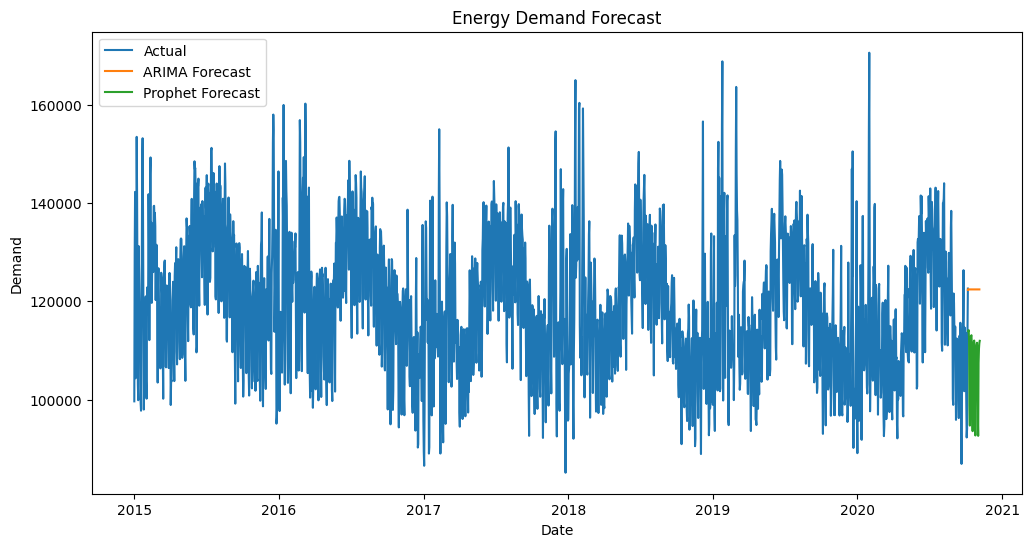

In [ ]:
import pandas as pd
import numpy as np
from statsmodels.tsa.arima.model import ARIMA
from prophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Load the data
df = pd.read_csv('/content/drive/MyDrive/DATASETS/complete_dataset (1).csv')  # Replace with your actual file name
df['date'] = pd.to_datetime(df['date'])
df.set_index('date', inplace=True)

# Prepare data for modeling
target_variable = 'demand'  # Replace with your target variable name

# Function to evaluate model performance
def evaluate_model(y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    return mae, rmse

# ARIMA Model
def fit_arima(data, order=(1,1,1)):
    model = ARIMA(data, order=order)
    results = model.fit()
    return results

# Fit ARIMA model
arima_model = fit_arima(df[target_variable])
arima_forecast = arima_model.forecast(steps=30)  # Forecast next 30 days

# Prophet Model
prophet_df = df.reset_index()[['date', target_variable]]
prophet_df.columns = ['ds', 'y']

model = Prophet()
model.fit(prophet_df)

future_dates = model.make_future_dataframe(periods=30)
prophet_forecast = model.predict(future_dates)

# Evaluate models
arima_mae, arima_rmse = evaluate_model(df[target_variable][-30:], arima_forecast)
prophet_mae, prophet_rmse = evaluate_model(df[target_variable][-30:], prophet_forecast['yhat'][-30:])

print(f"ARIMA - MAE: {arima_mae:.4f}, RMSE: {arima_rmse:.4f}")
print(f"Prophet - MAE: {prophet_mae:.4f}, RMSE: {prophet_rmse:.4f}")

# Plot results
plt.figure(figsize=(12, 6))
plt.plot(df.index, df[target_variable], label='Actual')
plt.plot(pd.date_range(start=df.index[-1], periods=30, freq='D'), arima_forecast, label='ARIMA Forecast')
plt.plot(prophet_forecast['ds'][-30:], prophet_forecast['yhat'][-30:], label='Prophet Forecast')
plt.legend()
plt.title('Energy Demand Forecast')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.show()